Tracking element #1 (s = 0.5 m, SourceBasic, stage 0)


/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Tracking element #2 (s = 0.8 m, StageNonlinear1D, stage 1)


unable to open /Users/carlal/UiO/python/OPAL/runscript_interstage.ele in mode r: No such file or directory
/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Tracking element #3 (s = 2.43 m, InterstageELEGANT, stage 1)
Tracking element #4 (s = 2.73 m, StageNonlinear1D, stage 2)


unable to open /Users/carlal/UiO/python/OPAL/runscript_interstage.ele in mode r: No such file or directory
/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Tracking element #5 (s = 4.93 m, InterstageELEGANT, stage 2)
Tracking element #6 (s = 5.23 m, StageNonlinear1D, stage 3)


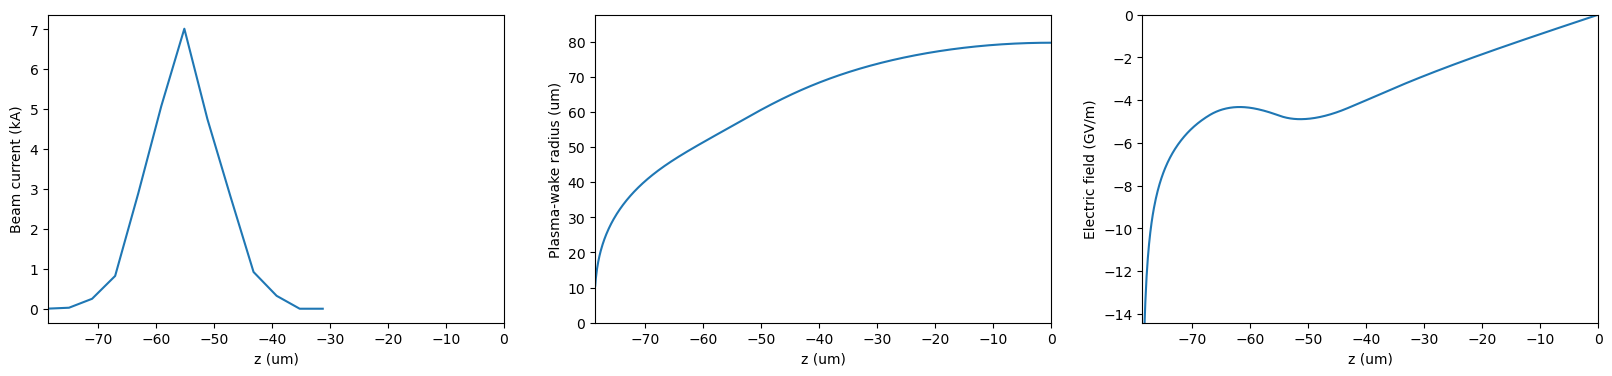

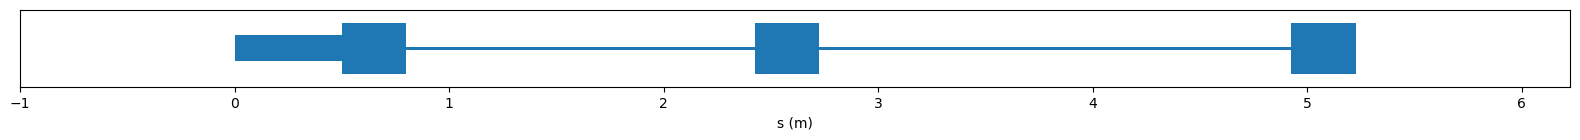

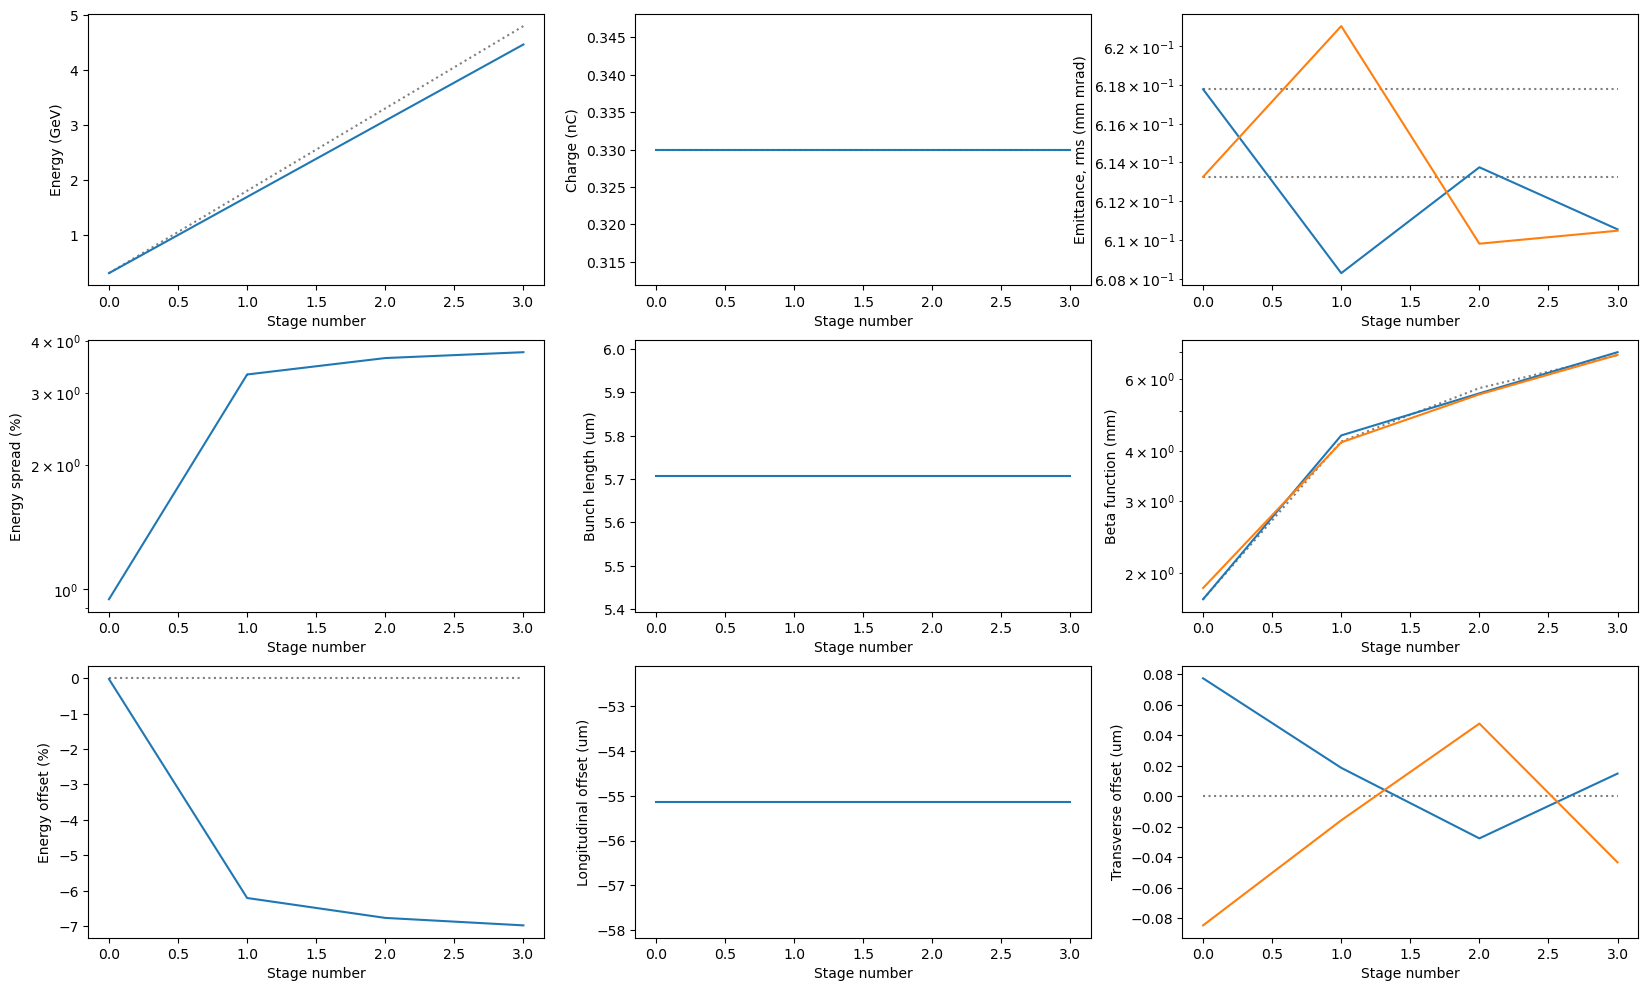

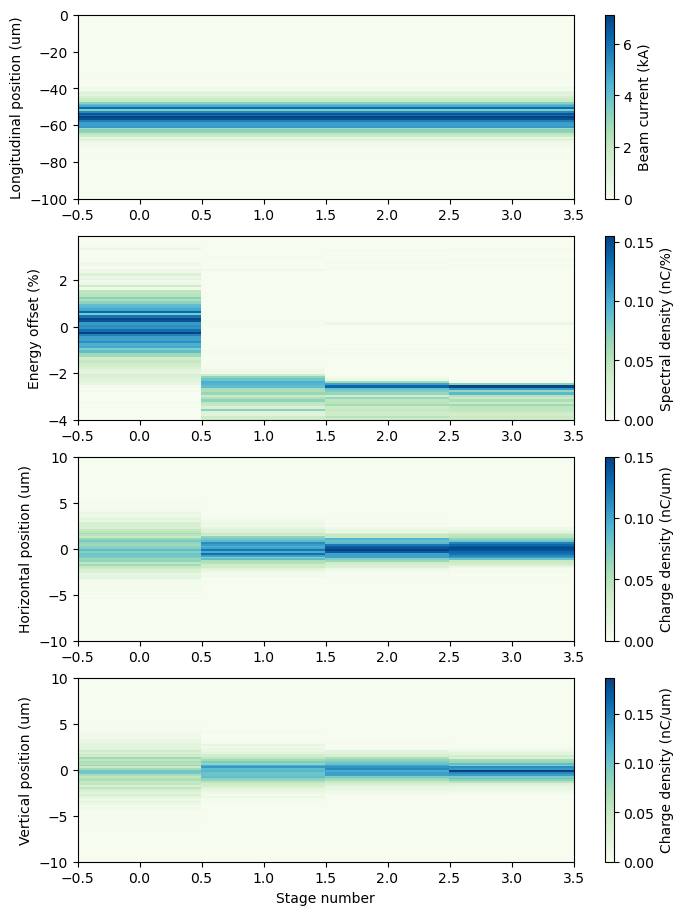

In [1]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageNonlinear1D, InterstageELEGANT, Linac
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

# define stage
stage = StageNonlinear1D()
stage.deltaE = 1.5e9 # [eV]
stage.L = 0.3 # [m]
stage.n0 = 1e22 # [m^-3]
stage.kRb = 1.5
stage.enableBetatron = True

# define beam
source = SourceBasic()
source.L = 0.5 # [m]
source.Q = -0.33e-9 # [C]
source.E0 = 0.3e9 # [eV]
source.sigE = 0.01*source.E0 # [eV]
source.sigz = 6e-6 # [m]
source.z = -55e-6 # [m]
source.emitnx = 1e-6 # [m rad]
source.emitny = 1e-6 # [m rad]
source.betax = beta_matched(stage.n0, source.E0) # [m]
source.betay = source.betax
source.Npart = 1000

# define interstage
interstage = InterstageELEGANT()
interstage.beta0 = lambda E: beta_matched(stage.n0, E) # [T]
interstage.Bdip = 0.5 # [T]
interstage.Ldip = lambda E: 0.8 * np.sqrt(E/10e9) # [m(eV)]

# define linac
linac = Linac(source, stage, interstage, 3)

# track particles
linac.run("mars_shot")

# plot survery and beam evolution
stage.plotWakefield(source.track())
linac.plotSurvey()
linac.plotEvolution()
linac.plotWaterfalls()